In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,4.0,7.0,5.0,5.0,5.0,5,9,6,4,8,7.0,9,2.0,9.0,7.0,10,NaN
2,7.0,10.0,8.0,7.0,4.0,8,8,5,10,11,2.0,8,2.0,5.0,5.0,10,NaN
3,4.0,9.0,5.0,7.0,4.0,7,7,13,1,7,6.0,8,3.0,8.0,0.0,8,NaN
4,6.0,7.0,8.0,5.0,4.0,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4,10,7,8,12,10.0,9,2.0,9.0,2.0,6,NaN
19996,4.0,7.0,6.0,5.0,3.0,7,8,2,10,12,6.0,8,1.0,9.0,6.0,8,NaN
19997,NaN,NaN,NaN,NaN,4.0,7,8,7,4,10,NaN,6,NaN,NaN,NaN,7,NaN
19998,NaN,NaN,NaN,NaN,3.0,0,2,4,6,1,NaN,7,NaN,NaN,NaN,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	3750
float64		column 4	4000
float64		column 5	250
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	4000
int64		column 12	0
float64		column 13	4000
float64		column 14	4000
float64		column 15	4000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16250.000000,16000.000000,19750.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16000.000000,20000.000000,16000.000000,16000.000000,16000.000000,20000.00000,0.0
mean,4.018875,7.014188,5.123323,5.350875,3.504810,6.897600,7.500450,4.628600,5.178650,8.282050,6.477688,7.929000,3.058562,8.347125,3.721312,7.80120,NaN
std,1.906304,3.285466,2.002289,2.246681,2.190102,2.026035,2.325354,2.699968,2.380823,2.488475,2.577725,2.080619,2.326499,1.539489,2.556864,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

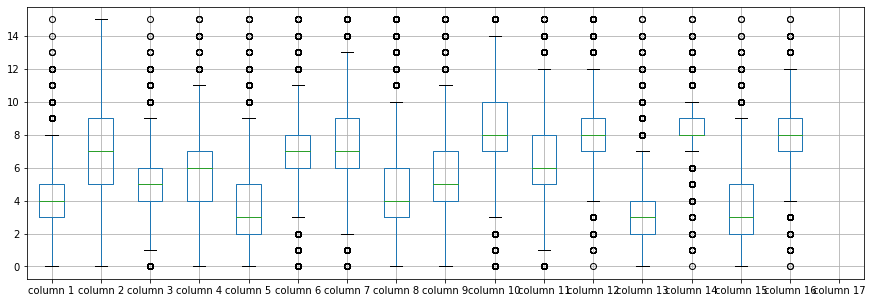

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.018875
column 2     7.014188
column 3     5.123323
column 4     5.350875
column 5     3.504810
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.477688
column 12    7.929000
column 13    3.058562
column 14    8.347125
column 15    3.721312
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.758136,0.850454,0.672578,0.613227,-0.046196,0.046828,0.010684,0.040865,0.138861,0.033119,-0.057389,0.485462,0.101872,0.262512,-0.130468,NaN
column 2,0.758136,1.000000,0.671745,0.824069,0.552371,0.032332,-0.036929,-0.030409,0.079683,0.155721,-0.055577,-0.025878,0.273535,0.005415,0.220338,-0.069560,NaN
column 3,0.850454,0.671745,1.000000,0.658456,0.764326,0.048560,0.021404,-0.104684,0.051515,0.102717,0.010056,-0.049888,0.558810,0.045422,0.250026,-0.145281,NaN
column 4,0.672578,0.824069,0.658456,1.000000,0.644336,0.027461,-0.012113,0.074513,0.039325,0.007296,-0.013650,0.006999,0.266717,0.033129,0.290347,-0.049689,NaN
column 5,0.613227,0.552371,0.764326,0.644336,1.000000,0.139019,-0.029270,-0.012441,-0.066128,-0.070148,-0.077713,-0.038036,0.632261,0.019003,0.484004,-0.064290,NaN
column 6,-0.046196,0.032332,0.048560,0.027461,0.139019,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.366023,-0.032115,0.140871,-0.247355,0.122903,0.248816,NaN
column 7,0.046828,-0.036929,0.021404,-0.012113,-0.029270,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.595504,-0.271649,-0.055074,0.550963,-0.094408,-0.207900,NaN
column 8,0.010684,-0.030409,-0.104684,0.074513,-0.012441,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.031338,0.082020,0.146617,-0.085080,0.006631,0.182902,NaN
column 9,0.040865,0.079683,0.051515,0.039325,-0.066128,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.056311,0.119048,-0.384877,-0.052441,0.262040,-0.061335,NaN
column 10,0.138861,0.155721,0.102717,0.007296,-0.070148,0.085963,0.178318,-0.317780,0.132000,1.000000,0.046686,-0.106759,-0.196156,0.028834,-0.111896,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+18,17+18+18,17+18+18+18,17+18+18,17+18,17], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 65.32810528869629
Epoch: 1 , loss: 44.92006962738037
Epoch: 2 , loss: 41.72589336853027
Epoch: 3 , loss: 40.25621497955322
Epoch: 4 , loss: 39.56625212249756
Epoch: 5 , loss: 39.12834350128174
Epoch: 6 , loss: 38.67122605438232
Epoch: 7 , loss: 38.44945977478027
Epoch: 8 , loss: 38.056819638061526
Epoch: 9 , loss: 38.09385205841065
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    1.315593
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
1,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
2,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
3,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
4,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
19996,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
19997,0.458285,-0.182820,1.616180,-0.120337,0.0,0,0,0,0,0,0.067977,0,0.309287,0.238672,1.167827,0,NaN
19998,-0.168166,-4.294388,0.755024,-2.915072,0.0,0,0,0,0,0,6.205167,0,2.898308,-0.286832,3.524622,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

502.84927404341624

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.13467434349494078

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.518244
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.000000,2.0,7,8,2,9,11,7.000000,7,1.000000,8.000000,5.000000,6,0.275222
1,4.000000,7.000000,5.000000,5.000000,5.0,5,9,6,4,8,7.000000,9,2.000000,9.000000,7.000000,10,-0.498254
2,7.000000,10.000000,8.000000,7.000000,4.0,8,8,5,10,11,2.000000,8,2.000000,5.000000,5.000000,10,-0.528622
3,4.000000,9.000000,5.000000,7.000000,4.0,7,7,13,1,7,6.000000,8,3.000000,8.000000,0.000000,8,0.871560
4,6.000000,7.000000,8.000000,5.000000,4.0,7,6,3,7,10,7.000000,9,3.000000,8.000000,3.000000,7,0.359390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,10.000000,5.000000,8.000000,3.0,4,10,7,8,12,10.000000,9,2.000000,9.000000,2.000000,6,1.114958
19996,4.000000,7.000000,6.000000,5.000000,3.0,7,8,2,10,12,6.000000,8,1.000000,9.000000,6.000000,8,0.575940
19997,4.458285,7.817180,5.616180,5.879663,4.0,7,8,7,4,10,7.067977,6,3.309287,9.238672,4.167827,7,-0.031081
19998,3.831834,6.705612,4.755024,5.084928,3.0,0,2,4,6,1,6.205167,7,2.898308,7.713168,3.524622,8,-0.019964


In [21]:
imputations[-1].to_excel("Letter_AG_10(imp).xlsx", index=False, header=False)